## Fourier Transforms Example: Light Switch

Suppose we turn a light switch at $t=t_0-\tau/2$, and turn it off at $t=t_0+\tau/2$. We treat $\tau$ and $t_0$ as constant parameters. The light emitted during this interval has average frequency $\nu_0$, also a constant parameter.

The electric field (complex number!) emitted is:
$$E = E_0\text e^{-2 i\pi \nu_0 t}\quad \text{if}\quad t_0 - \frac\tau2\leq t\leq t_0 + \frac\tau2,\qquad E = 0\quad\text{otherwise}.$$

Apply the Fourier Transform formula to get the field in "frequency space", i.e. as a function of frequency $\nu$ rather than time $t$.
$$\hat E = \int_{t_0-\tau/2}^{t_0+\tau/2} E(t)\text e^{2\pi i (\nu-\nu_0) t} \text d \nu = E_0\tau \text e^{2\pi i (\nu-\nu_0) t_0}\underbrace{\frac{\sin\left[\pi(\nu-\nu_0)\tau\right]}{\pi(\nu-\nu_0)\tau}}_{=\text{sinc}\left[(\nu-\nu_0)\tau\right]},$$
where $\text{sinc}$ is called the Cardinal sine function.

Let's use parameters: $\tau = 1s,~t_0 = 10s,~\nu_0=5$ Hz

### Exercise 1

Calculate and plot the mormalized real part of the field, $Re(E) / E_0$, from $t_0 - \frac\tau2\leq t\leq t_0 + \frac\tau2$. Hint: when discretizing time, try using 4096 values.

Text(0, 0.5, 'Re(E)/E0')

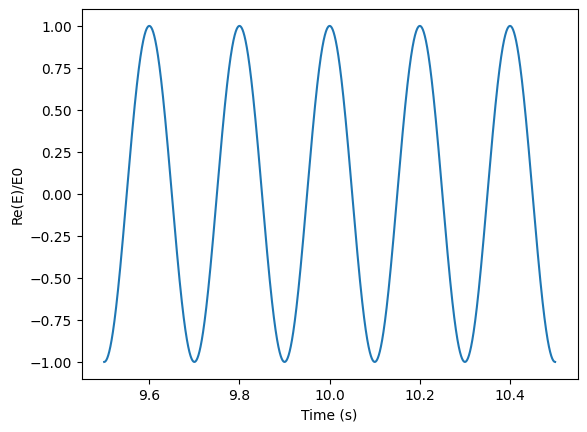

In [140]:
import numpy as np
import matplotlib.pyplot as plt


tau = 1  #[s]
t0 = 10  #[s]
v0 = 5  #[Hz]

t = np.linspace(t0-tau/2, t0+tau/2, 2**12)

E0 = 1  # placeholder variable in case we want to change it

E = E0 * np.exp(-2 * np.pi * v0 * t * 1j)

plt.plot(t, np.real(E)/E0)
plt.xlabel("Time (s)")
plt.ylabel("Re(E)/E0")

### Exercise 2

Now calculate, using the formula given (not using a packaged routine), the Fourier transform of the signal, i.e. $\hat{E}(\nu)$, for $0 \leq \nu \leq \nu_0$. Make two plots: $Re(\hat{E}) / (E_0 \tau)$ as a function of $\nu$, and $|\hat{E}| / (E_0 \tau) $ as a function of $\nu$. The second plot, which shows normalized amplitudes, is called the spectrum of the signal.

Note:
* Spectrum is centred around $\nu=\nu_0$, but non-negligible width (i.e. not all the light has frequency exactly $\nu_0$.) So the plane wave approximation doesn't exactly hold.
* If you increase duration or increase frequency: spectrum is narrower around $\nu=\nu_0$, and you have a better plane wave approximation.
* If you shorten duration or decrease frequency (e.g. pulsed laser): the frequency spreads out. (See https://www.nobelprize.org/prizes/physics/2023/press-release/ , Nobel Prize for attosecond lasers)
* Bandwidth theorem:
    $$\tau\Delta\nu \approx 1$$
    *You may recognize something like Heisenberg's uncertainty principle!*

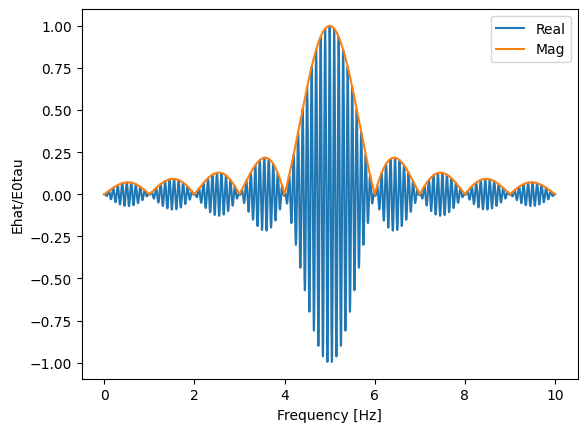

In [141]:
v = np.linspace(0, 10, 2**12)  # random array for frequency space
Ehat = E0 * tau * np.exp(2 * np.pi * t0 * (v-v0) * 1j) * np.sinc((v-v0) * tau)

plt.plot(v, np.real(Ehat)/(E0*tau), label="Real")
plt.plot(v, np.abs(Ehat)/(E0*tau), label='Mag')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Ehat/E0tau")
plt.legend()

## DFT Example: Pitch (Sound) Timeseries

Adapted from textbook's online material.

### Exercise 3

Using numpy.loadtxt, read in the text file "pitch.txt" provided. The values are floats. 

The file represents a "time series" of samples of the pitch of a sound wave, i.e. the next value in the series represents the pitch at the next sample. The samples are taken at a frequency of 44100 Hz.

Make a plot of pitch (arbitrary units) vs time.

Text(0, 0.5, 'Pitch (arb units)')

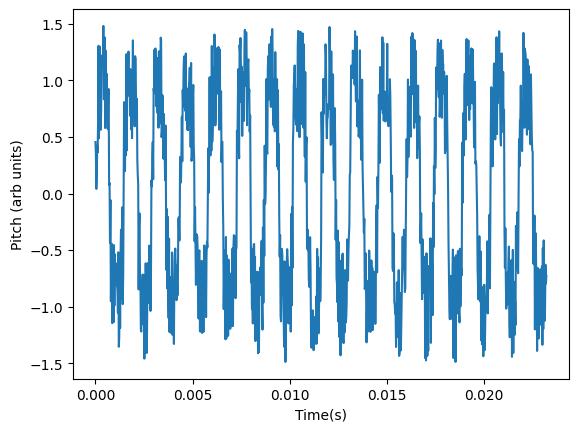

In [142]:
pitch = np.loadtxt('pitch.txt', float)  # extract pitch info from the file

frequency = 44100  # [Hz]
t = np.arange(0, 1/frequency*len(pitch), 1/frequency)  # time array from the frequency given

plt.plot(t, pitch)
plt.xlabel("Time(s)")
plt.ylabel("Pitch (arb units)")

### Exercise 4

Perform a Discrete Fourier Transform on the time series (the following code snippet from the textbook will help you). Using time.time, measure how long the transform takes. 

Plot the amplitudes (i.e. magnitudes) of the Fourier coefficients.

Time taken = 1.6080870628356934


Text(0.5, 1.0, 'DFT')

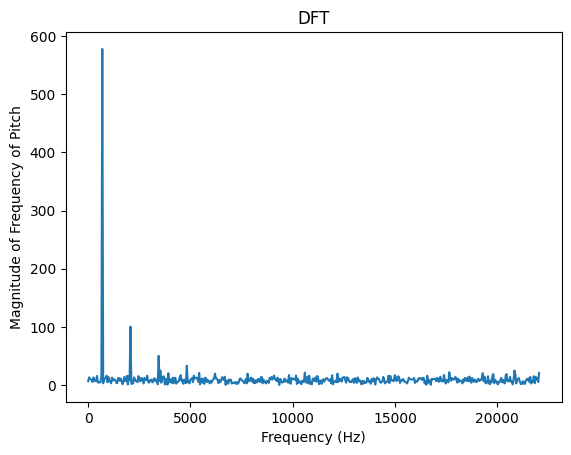

In [143]:
import numpy as np
import time
def dft(y):
    N = len(y)
    c = np.zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

# thank you for providing the function already!

start = time.time()
pitch_hat = dft(pitch)
print(f"Time taken = {time.time() - start}")

v = np.arange(0, len(t)//2 + 1) * frequency / len(t)

# print(len(pitch_hat), len(pitch), len(v))

plt.plot(v, np.abs(pitch_hat))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude of Frequency of Pitch")
plt.title("DFT")

## FFT Example: De-Noising a Signal

### Exercise 5

Repeat Exercise 4, but using numpy.fft.rfft instead of the dft code snippet from the textbook. Which algorithm is faster, and by how much? How close are the transform results?

Time taken = 0.00041413307189941406


Text(0.5, 1.0, 'FFT')

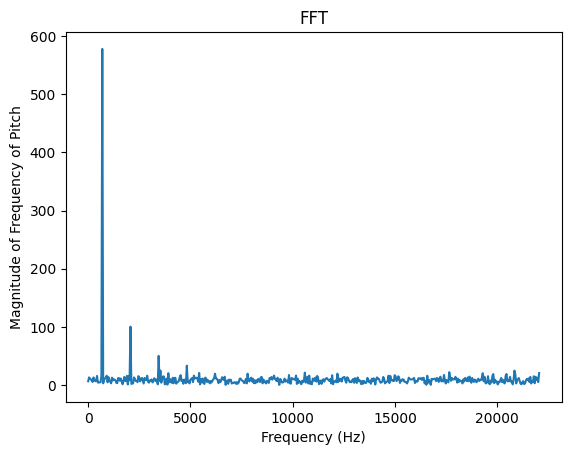

In [144]:
start = time.time()
pitch_hat = np.fft.rfft(pitch)
print(f"Time taken = {time.time() - start}")

plt.plot(v, np.abs(pitch_hat))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude of Frequency of Pitch")
plt.title("FFT")

Fast fourier transform is instantaenous (0.004s) while our dft takes about 2 seconds. Remarkable difference in time but the results are basicallt equivalent

### Exercise 6

We now seek to "de-noise" the signal. We will treat the three highest-amplitude frequencies as our "signal" which we want to isolate, and everything else as the "noise" which we want to eliminate. 

Convert the Fourier coefficients to frequencies by dividing them by $T$ (the total length of the time interval covered by the time series.) Now you should have an array of frequencies and an array of corresponding amplitudes.

Sort the frequencies by amplitude (you can use numpy.argsort if you like). Print the three "signal" frequencies, and their corresponding amplitudes.

In [148]:
v = np.arange(0, len(t)//2 + 1) * frequency / len(t)  # frequency array is times the last expected value / length of time?

sorted = np.argsort(-np.abs(pitch_hat))  
# returns in ascending order usually so when we flip, the first three are the max index
maxIndices = sorted[:3] 
maxFreq = v[maxIndices]

print(f"Highest frequencies are {maxFreq} Hz in that order")

# plt.plot(v, np.abs(pitch_hat)

Highest frequencies are [ 689.0625 2067.1875 3445.3125] Hz in that order


### Exercise 7

Now we will isolate the "noise".

Create a copy of the array of amplitudes (use numpy.copy). In the copy, zero out the largest three amplitudes (which you identified in the previous exercise). Inverse-transform the result, using np.fft.irfft, to get an array of pitch values. Plot it vs time.

1024


Text(0, 0.5, 'Noise amplitude')

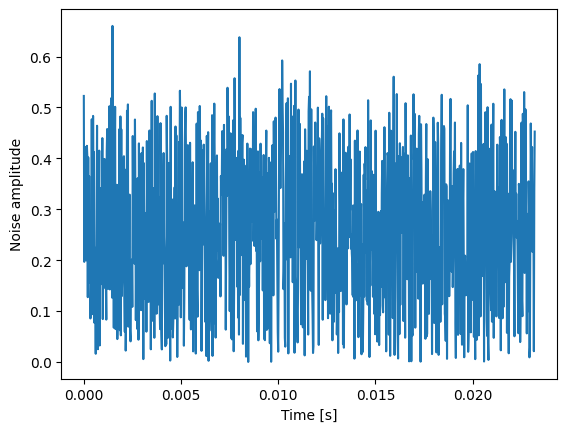

In [146]:
noise = np.copy(pitch_hat)
noise[maxIndices] = 0.  # set the three max indices to 0

noiseTime = np.fft.irfft(noise)

print(len(noiseTime))
plt.plot(t, np.abs(noiseTime))
plt.xlabel("Time [s]")
plt.ylabel("Noise amplitude")

### Exercise 8

Finally, let's plot the signal, i.e. the data with the noise subtracted out. Subtract your Exercise 7 array of pitch values from your original (Exercise 3) array of pitch values. Plot the result vs time.

Does the plot look a lot different from the results of Exercise 3?

Text(0, 0.5, 'Pitch w/out Noise [arb units]')

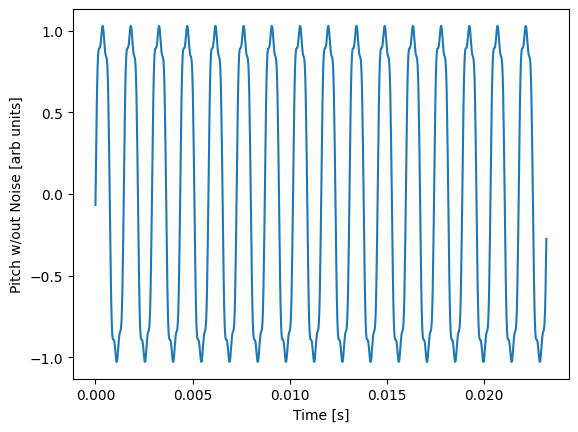

In [147]:
# Plotting the pitch without noise in time

plt.plot(t, pitch - noiseTime)
plt.xlabel("Time [s]")
plt.ylabel("Pitch w/out Noise [arb units]")

## This was a very cool lab. I learned a lot